In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import functions as f

In [2]:
# Set Lookback
lookback_window = 90

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-01-27
End Date: 2022-04-27


BTC/USD


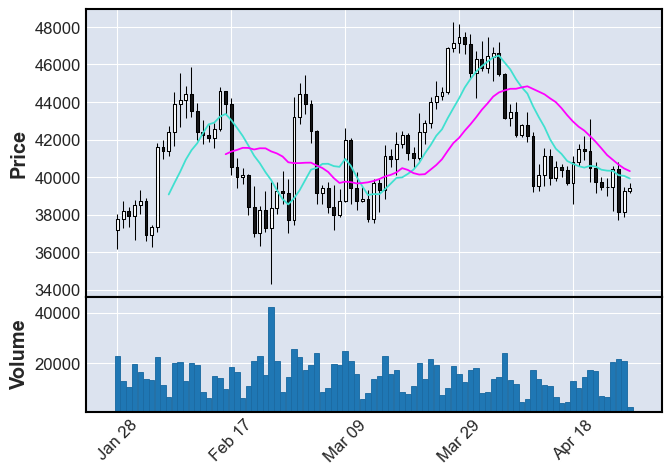

ETH/USD


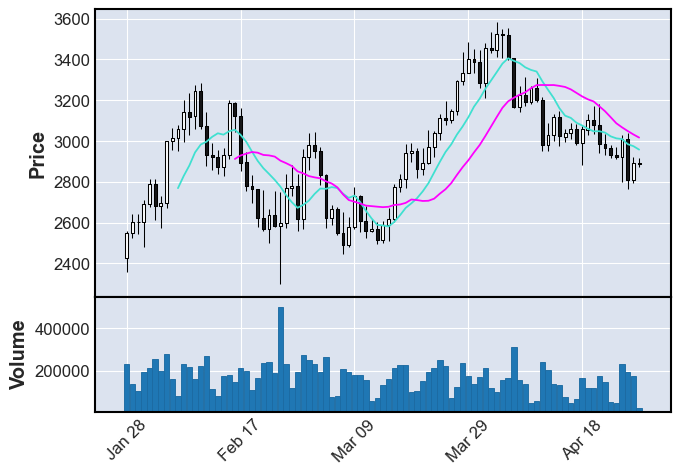

In [3]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    print(i)
    f.candle_stick(date_candle)

In [4]:
# Calculate satoshi bit coin

def satoshi_price(btc):
    satoshi = btc/100000000
    return satoshi

bitcoin_price = [46726.59,38000.00,35000.00]
bitcoin_sell_price = [70000.00,70000,70000]
investment = [100,200,300]

for i in range(len(investment)):
    satoshi_buy_price = satoshi_price(bitcoin_price[i])
    satoshi = investment[i]/satoshi_buy_price
    
    print('')
    print('Investment '+str(i+1))
    print('Satoshi Buy Price: $'+str(satoshi_buy_price))
    print('Investment: $'+str(investment[i]))
    print('Satoshi: '+str(satoshi))

    satoshi_sell_price = satoshi_price(bitcoin_sell_price[i])
    value = satoshi_sell_price*satoshi
    print('Satoshi Sell Price: $'+str(satoshi_sell_price))
    print('Value: $'+str(value))
    print('Net: $'+str(value-investment[i]))


Investment 1
Satoshi Buy Price: $0.00046726589999999995
Investment: $100
Satoshi: 214010.90899207498
Satoshi Sell Price: $0.0007
Value: $149.8076362944525
Net: $49.80763629445249

Investment 2
Satoshi Buy Price: $0.00038
Investment: $200
Satoshi: 526315.7894736842
Satoshi Sell Price: $0.0007
Value: $368.4210526315789
Net: $168.4210526315789

Investment 3
Satoshi Buy Price: $0.00035
Investment: $300
Satoshi: 857142.8571428572
Satoshi Sell Price: $0.0007
Value: $600.0
Net: $300.0


In [5]:
# Calculate wei bit coin

def wei_price(eth):
    wei = eth/pow(10,18)
    return wei

ethereum_price = [3525.92,2300.00,2100.00]
ethereum_sell_price = [4800.00,4800.00,4800.00]
investment = [100,300,500]

for i in range(len(investment)):
    ethereum_buy_price = wei_price(ethereum_price[i])
    wei = investment[i]/ethereum_buy_price
    
    print('')
    print('Investment '+str(i+1))
    print('Wei Buy Price: $'+str(ethereum_buy_price))
    print('Investment: $'+str(investment[i]))
    print('Wei: '+str(wei))
    
    wei_sell_price = wei_price(ethereum_sell_price[i])
    value = wei_sell_price*wei
    print('Wei Sell Price: $'+str(wei_sell_price))
    print('Value: $'+str(value))
    print('Net: $'+str(value-investment[i]))


Investment 1
Wei Buy Price: $3.52592e-15
Investment: $100
Wei: 2.836139220402051e+16
Wei Sell Price: $4.8e-15
Value: $136.13468257929844
Net: $36.13468257929844

Investment 2
Wei Buy Price: $2.3e-15
Investment: $300
Wei: 1.3043478260869566e+17
Wei Sell Price: $4.8e-15
Value: $626.0869565217391
Net: $326.0869565217391

Investment 3
Wei Buy Price: $2.1e-15
Investment: $500
Wei: 2.380952380952381e+17
Wei Sell Price: $4.8e-15
Value: $1142.857142857143
Net: $642.8571428571429


In [6]:
# Pivot by monthly high and low
# Generate BTC CSV.
data = f.fetch_daily_data(ticker_crypto[0])
df = pd.read_csv(data)

df['month'] = pd.to_datetime(df['date']).dt.strftime('%B') # make a month column to preserve the order
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y') # make a month column to preserve the order
pivot = pd.pivot_table(df, values=['high','low'], index=['month','year','ticker'],aggfunc=np.average)
pivot = pivot.sort_values(by=['month','year'], ascending = [True, True])
pivot

,,,high,low
month,year,ticker,,
April,2022,BTC-USD,42611.077500,40892.746071
August,2021,BTC-USD,46741.993548,44380.928710
December,2021,BTC-USD,50801.412258,47982.784839
February,2022,BTC-USD,41851.113214,39518.250000
January,2022,BTC-USD,42161.954194,40013.277419
July,2021,BTC-USD,35265.914828,33410.526897
March,2022,BTC-USD,42903.773226,40985.078065
November,2021,BTC-USD,62092.513333,59153.357000
October,2021,BTC-USD,59104.080968,56047.783871


[*********************100%***********************]  1 of 1 completed
BHP


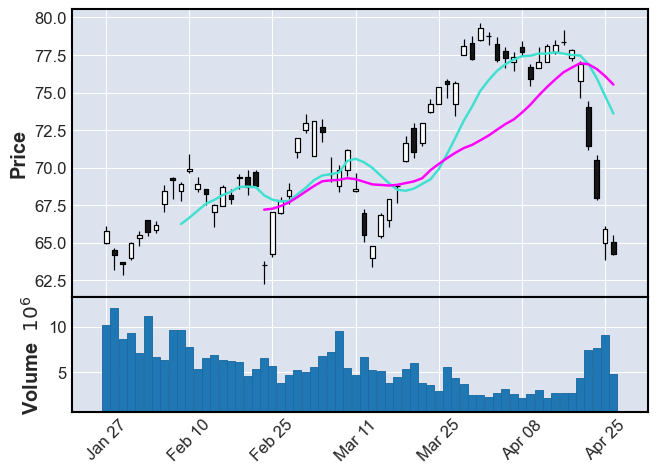

[*********************100%***********************]  1 of 1 completed
VALE


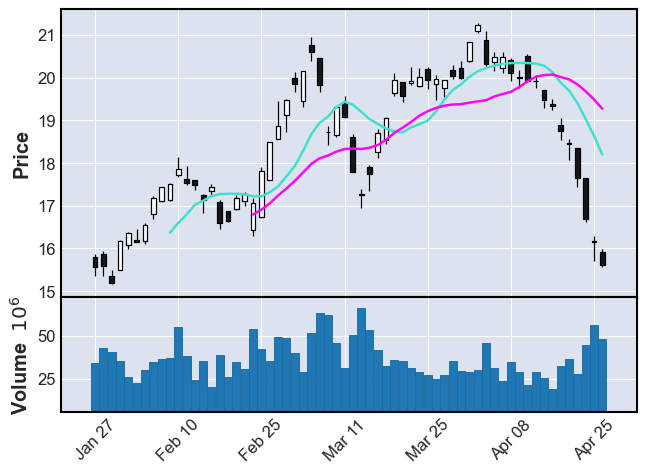

In [7]:
# Stock market data analysis commodities

# Set the ticker
ticker_stock = ['BHP','VALE']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data)

[*********************100%***********************]  1 of 1 completed
AAPL


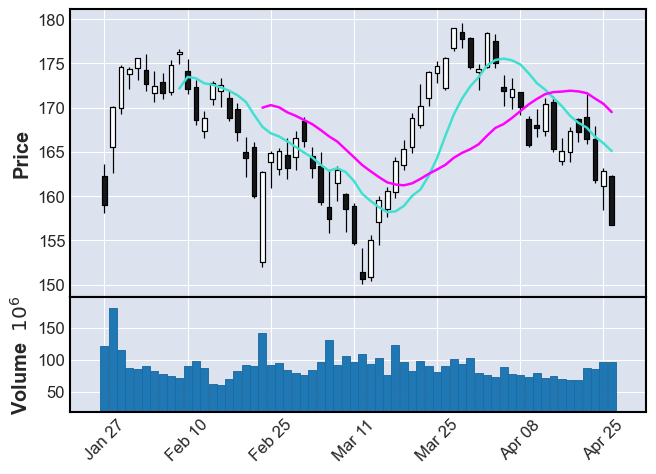

In [8]:
# Stock market data analysis tech

# Set the ticker
ticker_stock = ['AAPL']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data)

[*********************100%***********************]  1 of 1 completed
UNG


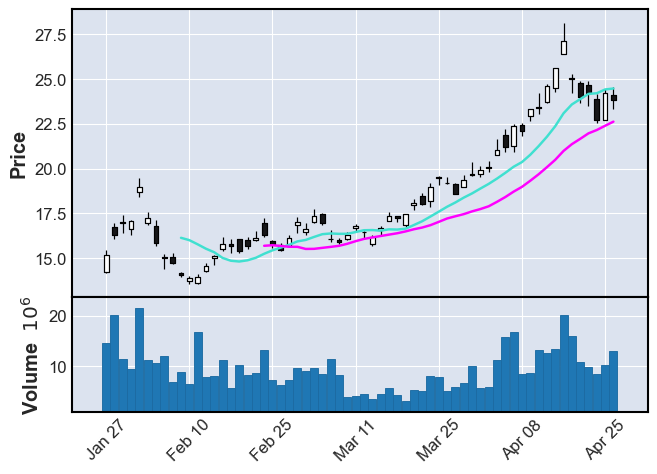

In [9]:
# Stock market data analysis energy

# Set the ticker
ticker_stock = ['UNG']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data)